# Task 2

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Loading  Dataset

In [2]:
df=pd.read_csv('tested.csv')

## Displaying First Few Rows

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Checking the structure of Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Summary statistics of numeric columns

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Find missing value

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Cleaning

## Fill Missing Fare with mean

In [7]:
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

## Fill Missing Cabin with unknown

In [9]:
df["Cabin"] = df["Cabin"].fillna("Unknown")


## Fill Missing Age with median

In [11]:
df["Age"] = df["Age"].fillna(df["Age"].median())

## Missing Values After Cleaning

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Checking Duplicate

In [12]:
df.duplicated().sum()

0

 ## Exploratory Data Analysis (EDA)

## Age Ditribution

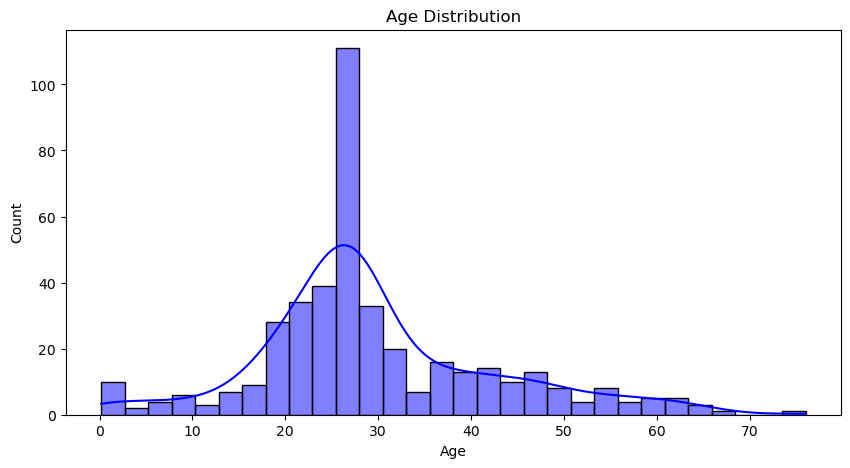

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df["Age"],bins=30,kde=True,color='blue')
plt.title("Age Distribution")
plt.show()

## Survival count

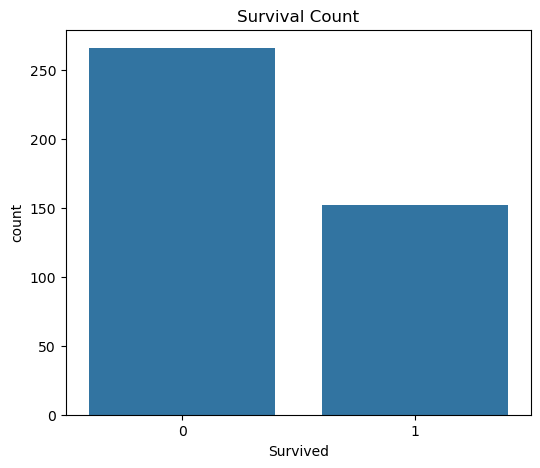

In [16]:
plt.figure(figsize=(6,5))
sns.countplot(x='Survived',data=df)
plt.title('Survival Count')
plt.show()

## Survival by Gender

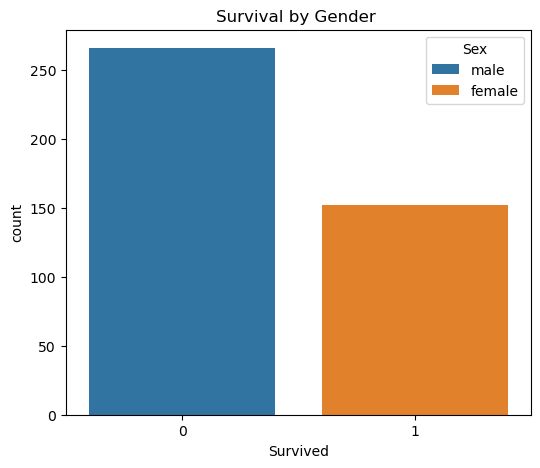

In [18]:
plt.figure(figsize=(6,5))
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title('Survival by Gender ')
plt.show()

## Survival by Passenger Class

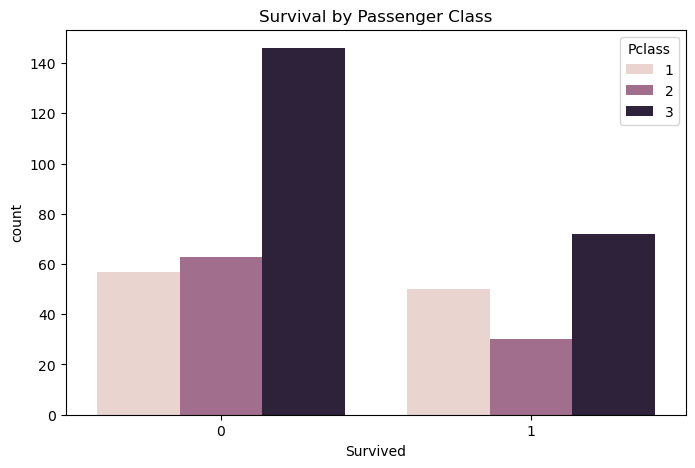

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.title('Survival by Passenger Class')
plt.show()

## Survival by Age

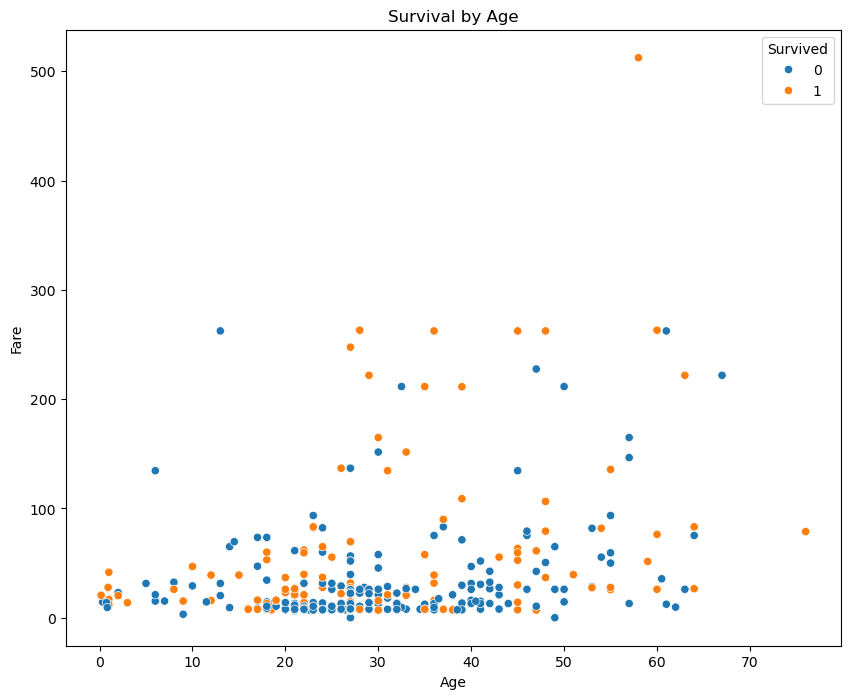

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=df)
plt.title('Survival by Age')
plt.show()

## Pairplot of Titanic Data

<Figure size 1200x600 with 0 Axes>

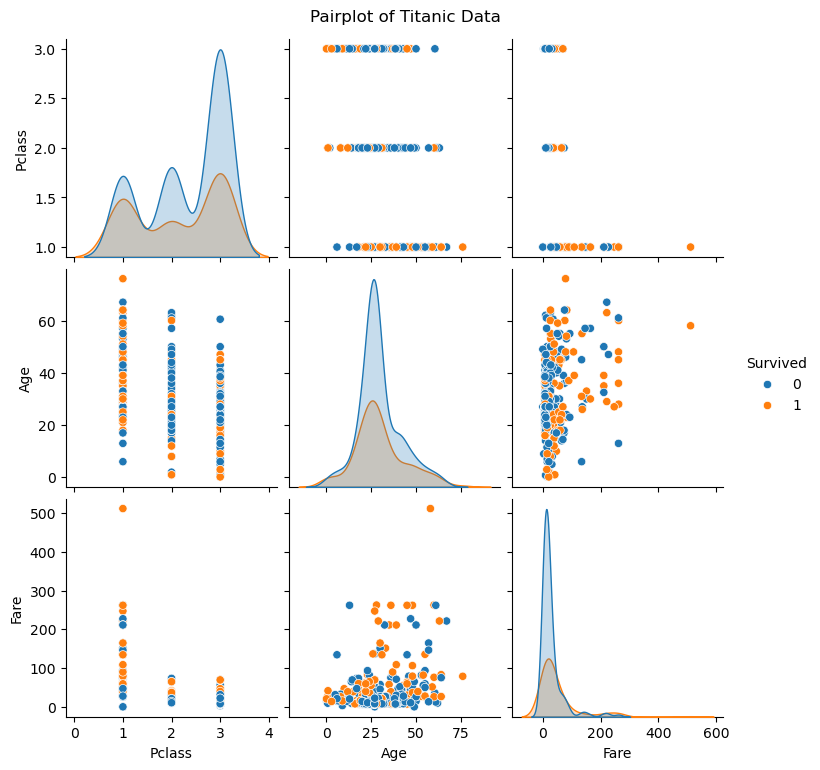

In [26]:
plt.figure(figsize=(12,6))
sns.pairplot(df[['Survived','Pclass','Sex','Age','Fare']],hue='Survived')
plt.suptitle("Pairplot of Titanic Data",y=1.02)
plt.show()